In [24]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

1.4.1
2.1.3


In [25]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [55]:
num_class = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

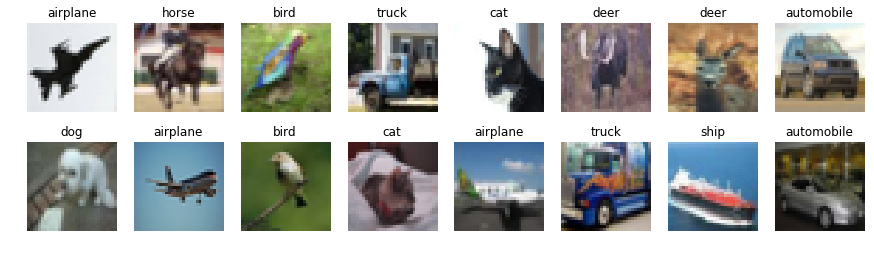

In [30]:
# show random images from train
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [38]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

In [39]:
def reset_tf_session():
    K.clear_session()
    tf.reset_default_graph()
    s = K.get_session()
    return s

In [40]:
import sys
sys.path.append("..")

In [50]:
def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    model = Sequential()
    """
    model = Sequential()
    model.add(Conv2D(kernel_size=(3,3), filters=16, input_shape = (32, 32, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(kernel_size=(3,3), filters=32, input_shape = (32, 32, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(kernel_size=(3,3), filters=32,input_shape = (32, 32, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(kernel_size=(3,3), filters=64,input_shape = (32, 32, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))

    model.add(Dense(10))
    model.add(Activation("softmax"))
    return model

In [52]:
K.clear_session()  # clear default graph
model = make_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
__________

In [57]:
epoch = 15
batch_size = 32
model_name = "keras_cnn_cifar10.h5"
data_augmentation = True
init_lr = 1e-4

# normalize inputs
x_train = x_train/255 - 0.5
x_test = x_test/255 - 0.5

# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


In [58]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)
print("train samples number", x_train.shape[0])
print("test samples number", x_test.shape[0])

Train samples: (50000, 32, 32, 3) (50000, 10)
Test samples: (10000, 32, 32, 3) (10000, 10)
train samples number 50000
test samples number 10000


In [62]:
import keras.preprocessing.image
datagen = ImageDataGenerator(width_shift_range=0.1, 
                             height_shift_range=0.1, 
                             horizontal_flip=True)
datagen.fit(x_train)

In [63]:
model = make_model()
opt = keras.optimizers.adamax(lr=init_lr, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epoch, 
                    validation_data=(x_test,y_test))

Epoch 1/15
1563/1563 [==============================] - 163s 105ms/step - loss: 2.0501 - acc: 0.2558 - val_loss: 1.8103 - val_acc: 0.3680
Epoch 2/15
1563/1563 [==============================] - 201s 129ms/step - loss: 1.7799 - acc: 0.3603 - val_loss: 1.5742 - val_acc: 0.4429
Epoch 3/15
1563/1563 [==============================] - 199s 127ms/step - loss: 1.6478 - acc: 0.4038 - val_loss: 1.4853 - val_acc: 0.4701
Epoch 4/15
1563/1563 [==============================] - 196s 126ms/step - loss: 1.5822 - acc: 0.4301 - val_loss: 1.4306 - val_acc: 0.4923
Epoch 5/15
1563/1563 [==============================] - 210s 134ms/step - loss: 1.5310 - acc: 0.4474 - val_loss: 1.3814 - val_acc: 0.5058
Epoch 6/15
1563/1563 [==============================] - 273s 175ms/step - loss: 1.4897 - acc: 0.4665 - val_loss: 1.3307 - val_acc: 0.5290
Epoch 7/15
1563/1563 [==============================] - 354s 226ms/step - loss: 1.4517 - acc: 0.4777 - val_loss: 1.2995 - val_acc: 0.5375
Epoch 8/15
1563/1563 [============

In [72]:
scores = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 7s 741us/step


In [73]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 1.1303995332717895
Test accuracy: 0.6036


In [76]:
import os
save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)